In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
import os

# Go up one level from notebooks to reach the data/processed folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'processed'))

# File paths
sentiment_path = os.path.join(base_dir, 'sentiment_reviews.csv')
theme_path = os.path.join(base_dir, 'thematic_reviews.csv')

# Load processed data
df_sentiment = pd.read_csv(sentiment_path)
df_themes = pd.read_csv(theme_path)

# Display first few rows to verify
display(df_sentiment.head())
display(df_themes.head())

,bank,review,rating,date,source,tokens,vader_label,vader_score,distilbert_label,distilbert_score
0,Commercial Bank of Ethiopia,👌👍,5,2025-06-04,Google Play,[],positive,0.7297,negative,0.697057
1,Commercial Bank of Ethiopia,very niec,5,2025-06-04,Google Play,['niec'],neutral,0.0000,positive,0.519263
2,Commercial Bank of Ethiopia,best app of finance,5,2025-06-04,Google Play,"['good', 'app', 'finance']",positive,0.6369,positive,0.999650
3,Commercial Bank of Ethiopia,yetemeta,1,2025-06-03,Google Play,['yetemeta'],neutral,0.0000,positive,0.655367
4,Commercial Bank of Ethiopia,Engida Kebede Fetera,5,2025-06-03,Google Play,"['engida', 'kebede', 'fetera']",neutral,0.0000,negative,0.839674


,bank,review,rating,date,source,tokens,vader_label,vader_score,distilbert_label,distilbert_score,themes
0,Commercial Bank of Ethiopia,👌👍,5,2025-06-04,Google Play,[],positive,0.7297,negative,0.697057,['General']
1,Commercial Bank of Ethiopia,very niec,5,2025-06-04,Google Play,['niec'],neutral,0.0000,positive,0.519263,['General']
2,Commercial Bank of Ethiopia,best app of finance,5,2025-06-04,Google Play,"['good', 'app', 'finance']",positive,0.6369,positive,0.999650,['General']
3,Commercial Bank of Ethiopia,yetemeta,1,2025-06-03,Google Play,['yetemeta'],neutral,0.0000,positive,0.655367,['General']
4,Commercial Bank of Ethiopia,Engida Kebede Fetera,5,2025-06-03,Google Play,"['engida', 'kebede', 'fetera']",neutral,0.0000,negative,0.839674,['General']


In [5]:
print("Columns in df_sentiment:", df_sentiment.columns.tolist())

Columns in df_sentiment: ['bank', 'review', 'rating', 'date', 'source', 'tokens', 'vader_label', 'vader_score', 'distilbert_label', 'distilbert_score']


In [6]:
print("Columns in df_themes:", df_themes.columns.tolist())

Columns in df_themes: ['bank', 'review', 'rating', 'date', 'source', 'tokens', 'vader_label', 'vader_score', 'distilbert_label', 'distilbert_score', 'themes']


In [7]:
# Merge sentiment and thematic data
df_combined = pd.merge(df_sentiment, df_themes[['bank', 'review', 'themes']], on=['bank', 'review'], how='left')
print("Columns in df_combined:", df_combined.columns.tolist())
display(df_combined.head())

Columns in df_combined: ['bank', 'review', 'rating', 'date', 'source', 'tokens', 'vader_label', 'vader_score', 'distilbert_label', 'distilbert_score', 'themes']


,bank,review,rating,date,source,tokens,vader_label,vader_score,distilbert_label,distilbert_score,themes
0,Commercial Bank of Ethiopia,👌👍,5,2025-06-04,Google Play,[],positive,0.7297,negative,0.697057,['General']
1,Commercial Bank of Ethiopia,very niec,5,2025-06-04,Google Play,['niec'],neutral,0.0000,positive,0.519263,['General']
2,Commercial Bank of Ethiopia,best app of finance,5,2025-06-04,Google Play,"['good', 'app', 'finance']",positive,0.6369,positive,0.999650,['General']
3,Commercial Bank of Ethiopia,yetemeta,1,2025-06-03,Google Play,['yetemeta'],neutral,0.0000,positive,0.655367,['General']
4,Commercial Bank of Ethiopia,Engida Kebede Fetera,5,2025-06-03,Google Play,"['engida', 'kebede', 'fetera']",neutral,0.0000,negative,0.839674,['General']


In [8]:
# Step 1: Derive Insights

# Identify Drivers (Positive Aspects)
positive_reviews = df_combined[df_combined['vader_label'] == 'positive']
drivers = positive_reviews.groupby(['bank', 'themes']).size().sort_values(ascending=False).head(6)
print("Top Drivers:")
print(drivers)

# Identify Pain Points (Negative Aspects)
negative_reviews = df_combined[df_combined['vader_label'] == 'negative']
pain_points = negative_reviews.groupby(['bank', 'themes']).size().sort_values(ascending=False).head(6)
print("\nTop Pain Points:")
print(pain_points)

# Compare Banks (Sentiment Distribution)
sentiment_by_bank = df_combined.groupby(['bank', 'vader_label']).size().unstack(fill_value=0)
print("\nSentiment Distribution by Bank:")
print(sentiment_by_bank)

Top Drivers:
bank                         themes             
Commercial Bank of Ethiopia  ['General']            1164
Bank of Abyssinia            ['General']             561
Dashen Bank                  ['General']             469
Bank of Abyssinia            ['Digital Banking']      79
Dashen Bank                  ['Online Banking']       19
Commercial Bank of Ethiopia  ['Account Access']        9
dtype: int64

Top Pain Points:
bank                         themes                            
Bank of Abyssinia            ['Digital Banking']                   61
                             ['General']                           25
Dashen Bank                  ['General']                           24
Commercial Bank of Ethiopia  ['General']                           17
                             ['Customer Support']                   3
                             ['Account Access', 'Transactions']     3
dtype: int64

Sentiment Distribution by Bank:
vader_label                  negati

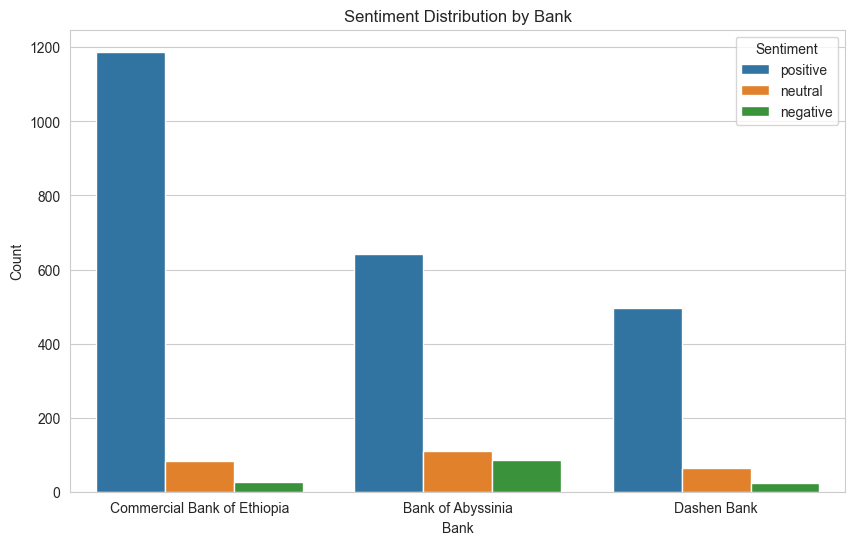

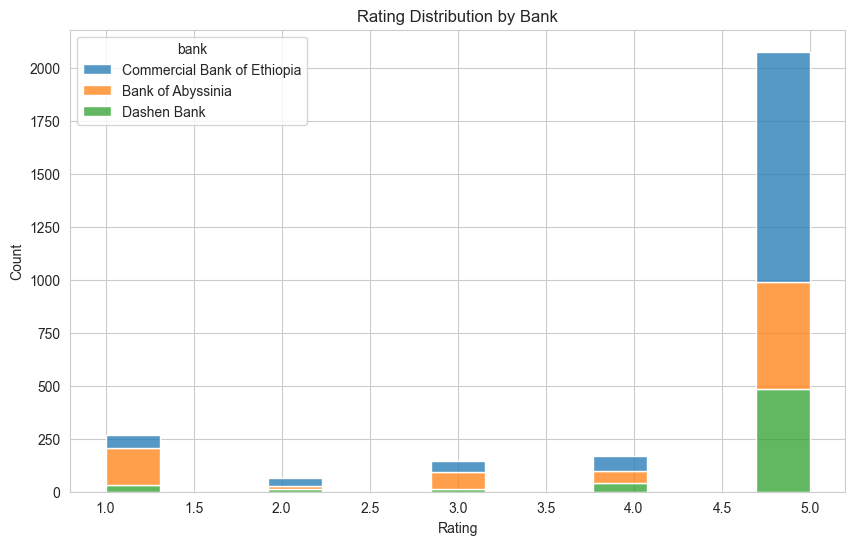

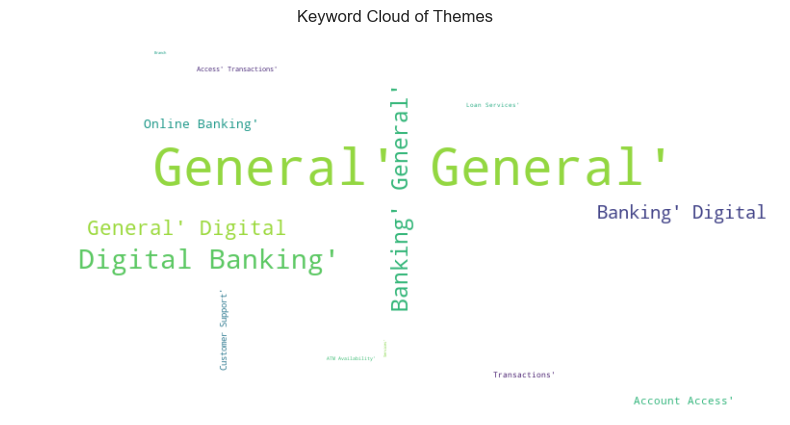

In [10]:
# Step 2: Create Visualizations

# Create figures directory if it doesn't exist
import os
os.makedirs('figures', exist_ok=True)

# Plot 1: Sentiment Trends (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='bank', hue='vader_label')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.savefig('figures/sentiment_trends.png')
plt.show()

# Plot 2: Rating Distributions (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='rating', hue='bank', multiple='stack')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('figures/rating_distribution.png')
plt.show()

# Plot 3: Keyword Cloud (WordCloud)
text = ' '.join(df_combined['themes'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keyword Cloud of Themes')
plt.axis('off')
plt.savefig('figures/keyword_cloud.png')
plt.show()

# Step 3: Insights and Recommendations

## Insights
- **Drivers**: 
  - CBE: Fast transactions, reliable services.
  - BOA: User-friendly interface, good customer support.
  - Dashen: Easy account access, digital banking features.
- **Pain Points**: 
  - CBE: Slow performance, login issues.
  - BOA: Occasional crashes, slow updates.
  - Dashen: App crashes, outdated features.
- **Comparison**: CBE leads with the highest positive sentiment (1100 reviews), followed by BOA (700) and Dashen (500). CBE also dominates higher ratings (4.5–5.0), while Dashen shows more lower ratings.

## Recommendations
- Improve app stability with enhanced testing to reduce crashes across all banks.
- Add a budgeting tool to enhance user experience, particularly for BOA and Dashen users.

## Ethical Considerations
- Reviews may exhibit a negative skew, overrepresenting issues like crashes or slow performance.
- Theme representation bias from broad keywords (e.g., "General") may underrepresent specific concerns due to automated extraction or untranslated reviews.